In [0]:
print('Hello Notebook')

Hello Notebook


In [1]:
!pip install kaggle


In [0]:
!mkdir .kaggle

In [0]:
import json

token = {"username":"yiba18", "key":"2ad6ecaabaa34964fcdd95cd8b704744"}

with open('/content/.kaggle/kaggle.json','w') as file:
  json.dump(token,file)

In [11]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!mkdir ~/.kaggle

In [0]:
!cp .kaggle/kaggle.json ~/.kaggle/kaggle.json

In [14]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 ~/.kaggle/kaggle.json

### Find the desired dataset

In [18]:
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                      2MB  2019-08-12 16:24:45            925  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           1533  
AnalyzeBoston/crimes-in-boston                            Crimes in Boston                                   10MB  2018-09-04 17:56:03          13102  
bradklassen/pga-tour-20102018-data                        PGA Tour Golf Data                                 92MB  2019-08-20 10:32:59           4238  
jolasa/waves-measuring-buoys-data-mooloolaba              Waves Measuring Buoys Data    

In [19]:
!kaggle datasets list -s climate

ref                                                           title                                               size  lastUpdated          downloadCount  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
berkeleyearth/climate-change-earth-surface-temperature-data   Climate Change: Earth Surface Temperature Data      86MB  2017-05-01 17:29:10          36280  
theworldbank/world-bank-climate-change-data                   World Bank Climate Change Data                      40MB  2019-05-16 20:00:44            701  
cwiloc/climate-data-from-ocean-ships                          Ocean Ship Logbooks (1750-1850)                     19MB  2017-11-16 00:59:48           3218  
crawford/agricultural-survey-of-african-farm-households       Agricultural Survey of African Farm Households       4MB  2017-07-20 18:07:44           2072  
brankokokanovic/wiki-climate                              

In [8]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data -p ./ClimateData

climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
!ls

ClimateData  sample_data


In [9]:
%cd ClimateData/

/content/ClimateData


In [10]:
!unzip ./climate-change-earth-surface-temperature-data.zip

Archive:  ./climate-change-earth-surface-temperature-data.zip
replace GlobalLandTemperaturesByCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  


### Explore the data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [12]:

d = pd.read_csv('./GlobalTemperatures.csv')

d.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
rs = round(d[0:1999].describe(),2)
rs

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1987.00,1987.00,799.00,799.00,799.00,799.00,799.00,799.00
mean,8.09,1.41,14.01,0.93,2.19,0.79,14.96,0.19
std,4.47,1.15,4.33,0.70,4.18,0.52,1.27,0.07
min,-2.08,0.18,5.90,0.22,-5.41,0.21,12.48,0.10
25%,3.99,0.46,9.79,0.42,-1.94,0.38,13.76,0.14
50%,8.23,1.11,14.30,0.67,2.31,0.63,15.02,0.16
75%,12.31,2.03,17.89,1.23,6.11,1.05,16.17,0.24
max,19.02,7.88,20.73,4.37,9.21,3.50,17.08,0.46


In [77]:
rs_modern = round(d[2000:].describe(),2)
rs_modern

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1192.00,1192.00,1192.00,1192.00,1192.00,1192.00,1192.00,1192.00
mean,8.84,0.15,14.57,0.17,3.11,0.19,15.38,0.08
std,4.18,0.08,4.28,0.08,4.10,0.08,1.25,0.03
min,1.88,0.03,7.23,0.04,-3.88,0.04,12.84,0.04
25%,4.82,0.08,10.53,0.11,-0.93,0.12,14.22,0.06
50%,9.21,0.12,14.96,0.16,3.37,0.18,15.43,0.07
75%,13.05,0.22,18.88,0.23,7.11,0.25,16.57,0.12
max,15.48,0.34,21.32,0.53,9.72,0.50,17.61,0.16


In [78]:
d.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

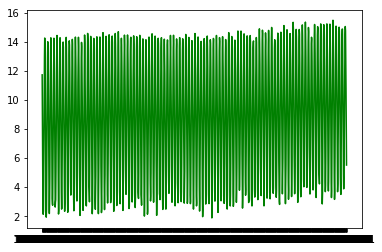

In [83]:
plt.plot(d[2000:]['dt'],d[2000:]['LandAverageTemperature'],color='green')
plt.show()

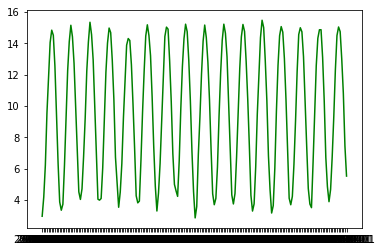

In [84]:
plt.plot(d[3000:]['dt'],d[3000:]['LandAverageTemperature'],color='green')
plt.show()

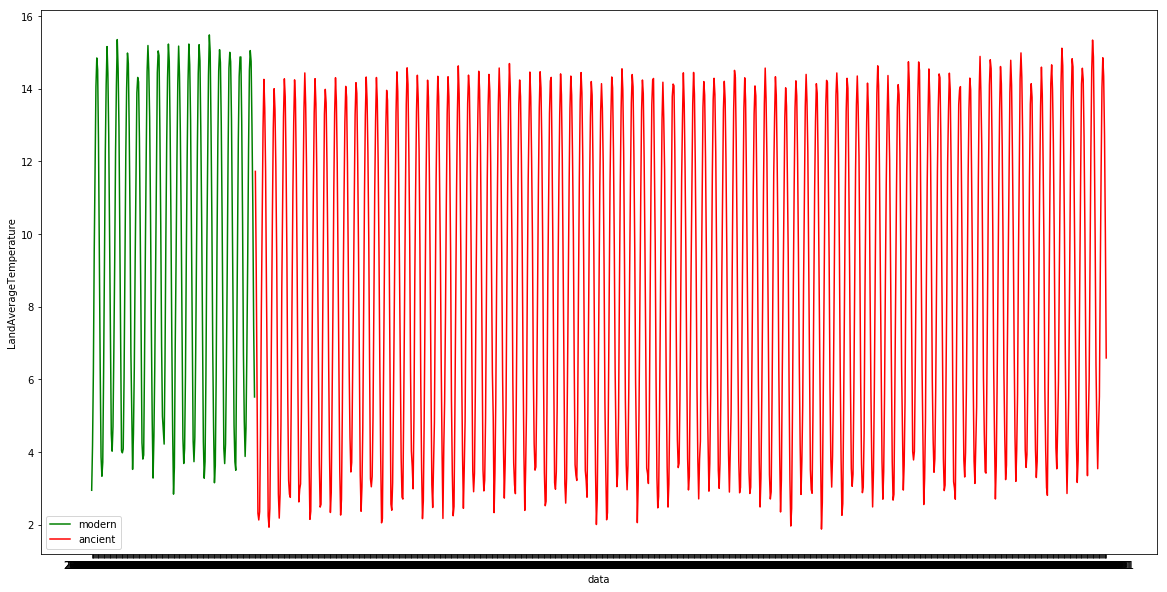

In [92]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=d[3000:]['dt'],y=d[3000:]['LandAverageTemperature'], color='g',ax=ax)
sns.lineplot(x=d[2000:2999]['dt'],y=d[2000:2999]['LandAverageTemperature'],color='r',ax=ax)
ax.legend(['modern','ancient'],facecolor='w')
ax.set_xlabel("data")
plt.show()

In [95]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks 
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [99]:
!pip install plotly.express

     |████████████████████████████████| 7.1MB 4.8MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [13]:
import plotly.express as px

import pandas as pd
fig = px.line(d[3000::3], x='dt',y='LandAverageTemperature')
fig.show()

In [0]:
import plotly.graph_objects as go 


In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d[2500:]['dt'],y=d[2500:]['LandMinTemperature'],name='Low Temp',line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=d[2500:]['dt'],y=d[2500:]['LandMaxTemperature'],name='High Temp',line_color='dimgray'))

fig.update_layout(title_text='HighLow Comparison',xaxis_rangeslider_visible=True)

fig.show()